Introduction

The doctor Consultation fees dataset that we are anylyzing is the data set in which we are going to predict the consultation fees of the doctor on the basis of their Qualification,Experience,Rating,Place,Profile and Miscellaneous information.

Dataset

The datset used in this project is divided into train and test data.In train data we have 5961 instances and 7 features. And on test data we have 1987 instances and 6 features.

Lets work on the dataset to predict the consultation fees of the daoctor on the basis of their qualification,experience,rating,place,profile and miscellaneous.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("doctor_train.csv")

In [3]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [5]:
df.keys

<bound method NDFrame.keys of                        Qualification           Experience Rating  \
0              BHMS, MD - Homeopathy  24 years experience   100%   
1       BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2     MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3                BSc - Zoology, BAMS  12 years experience    NaN   
4                               BAMS  20 years experience   100%   
...                              ...                  ...    ...   
5956                  MBBS, MS - ENT  19 years experience    98%   
5957                            MBBS  33 years experience    NaN   
5958                            MBBS  41 years experience    97%   
5959     MBBS, MD - General Medicine  15 years experience    90%   
5960         BDS, MDS - Orthodontics  17 years experience   100%   

                              Place           Profile  \
0               Kakkanad, Ernakulam         Homeopath   
1             Whitefield, Bangalore    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Except target variable (Fees)all independent variables datatype is object

In [8]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Variables Rating, Place and Miscellaneous_Info  has null values. I am going to remove variable Miscellaneous_Info as the has huge number of missing value(2620 )and hence will not contribute in data modelling.Even Rating variable also have large no of null value but we will replace the null value with 0% as it is an important variable for predicting the target.

In [9]:
df.drop(['Miscellaneous_Info'],axis=1, inplace= True)

In [10]:
df['Rating'].fillna('0%',inplace=True)

In [11]:
df['Place'].fillna(df['Place'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

I am sorting out and spliting  Qualification with the help of lambda fuction as this variable has lot of sub field of Qualification

In [13]:
sorted(df.Qualification[df.Qualification.apply(lambda x: len(x.split(','))).idxmax()].split(","))

[' Certificate in Cosmetic Dentistry',
 ' Certification in Full Mouth Rehabilitation',
 ' Certified Advance Course In Endodontics',
 ' Certified BPS Dentist',
 ' Certified in Orthodontics',
 ' Degree in Dental Implant',
 ' Fellowship in Advanced Endoscopic Sinus Surgery',
 ' Fellowship in Lasers & Cosmetology',
 ' Professional Implantology Training Course (PITC)',
 'Fellowship in Oral implantlogy']

In [14]:
import re

def sortQualification(text):
    arr =re.sub(r'\([^()]+\)',lambda x:x.group().replace(",","-"),text)
    return ','.join(sorted(arr.lower().replace(" ","").split(",")))

In [15]:
df.Qualification= df.Qualification.apply(lambda x: sortQualification(x))

In [16]:
df.Qualification

0                bhms,md-homeopathy
1          bams,md-ayurvedamedicine
2       mbbs,ms-otorhinolaryngology
3                  bams,bsc-zoology
4                              bams
                   ...             
5956                    mbbs,ms-ent
5957                           mbbs
5958                           mbbs
5959        mbbs,md-generalmedicine
5960           bds,mds-orthodontics
Name: Qualification, Length: 5961, dtype: object

Converting string values of "Experience" and "Rating" into integers

In [17]:
df["Experience"]=df["Experience"].str.split()
df["Experience"]= df["Experience"].str[0].astype("int")

In [18]:
df["Rating"]= df["Rating"].str[:-1].astype("int")

In [19]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,"bhms,md-homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,100
1,"bams,md-ayurvedamedicine",12,98,"Whitefield, Bangalore",Ayurveda,350
2,"mbbs,ms-otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"bams,bsc-zoology",12,0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,bams,20,100,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,98,"Basavanagudi, Bangalore",ENT Specialist,300
5957,mbbs,33,0,"Nungambakkam, Chennai",General Medicine,100
5958,mbbs,41,97,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"mbbs,md-generalmedicine",15,90,"Vileparle West, Mumbai",General Medicine,100


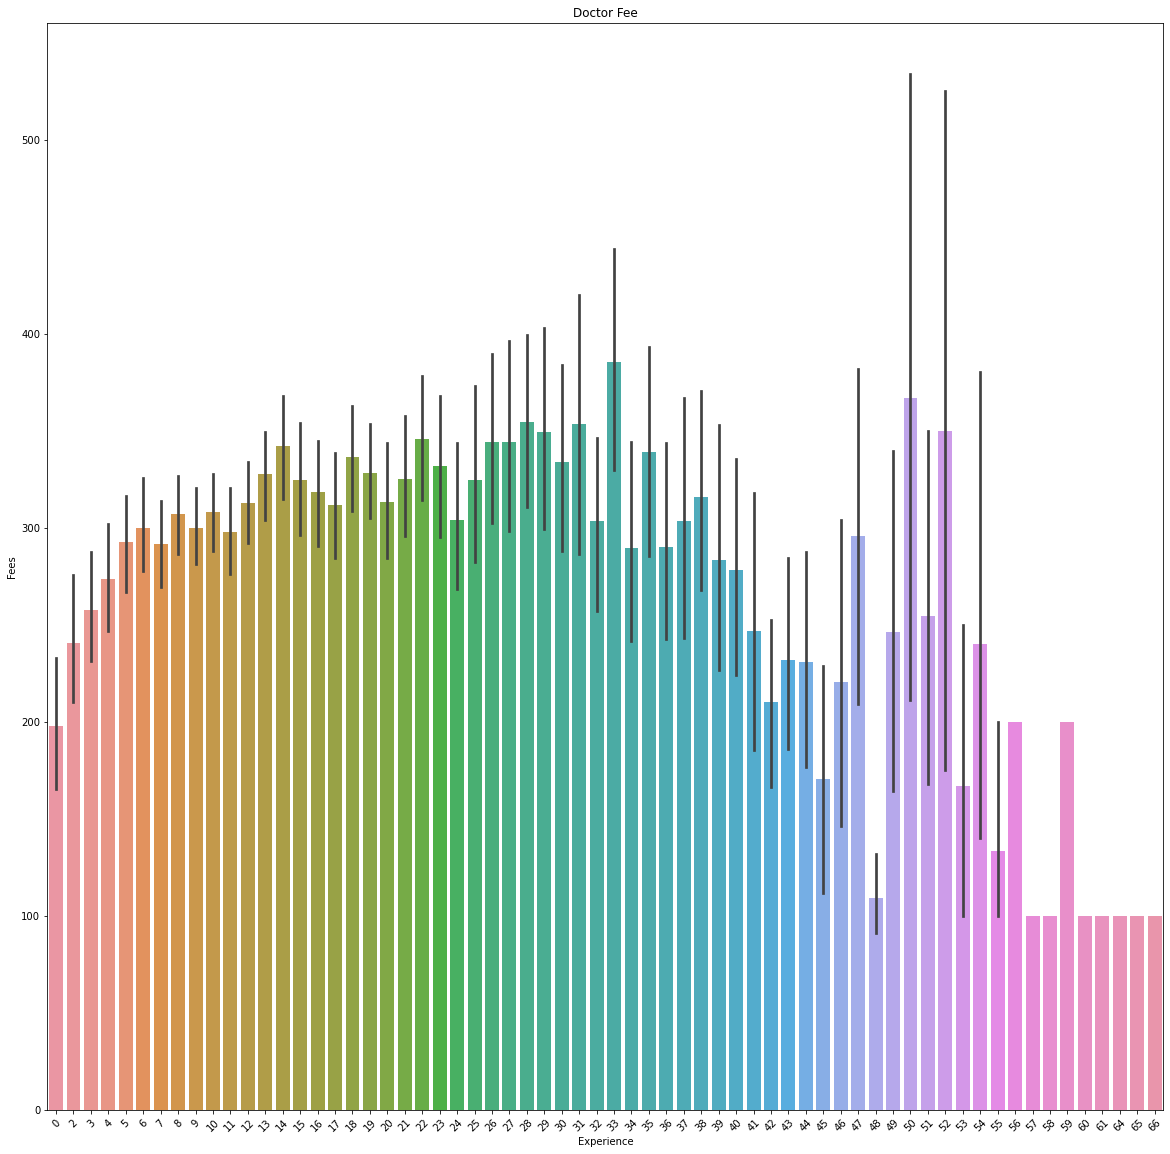

In [20]:
plt.figure(figsize=(20,20))
sns.barplot(x='Experience',y='Fees',data=df)
plt.title("Doctor Fee")
plt.xticks(rotation=45)
plt.show()

The above graphs shows that 50-52 years of experienced doctors are getting higher consulatation fees Though there is not much correlation between experience and Fees even some doctor with lees experience are geeting hiegher fees andSome doctor have 60+ experience but their consultation fees is very less.

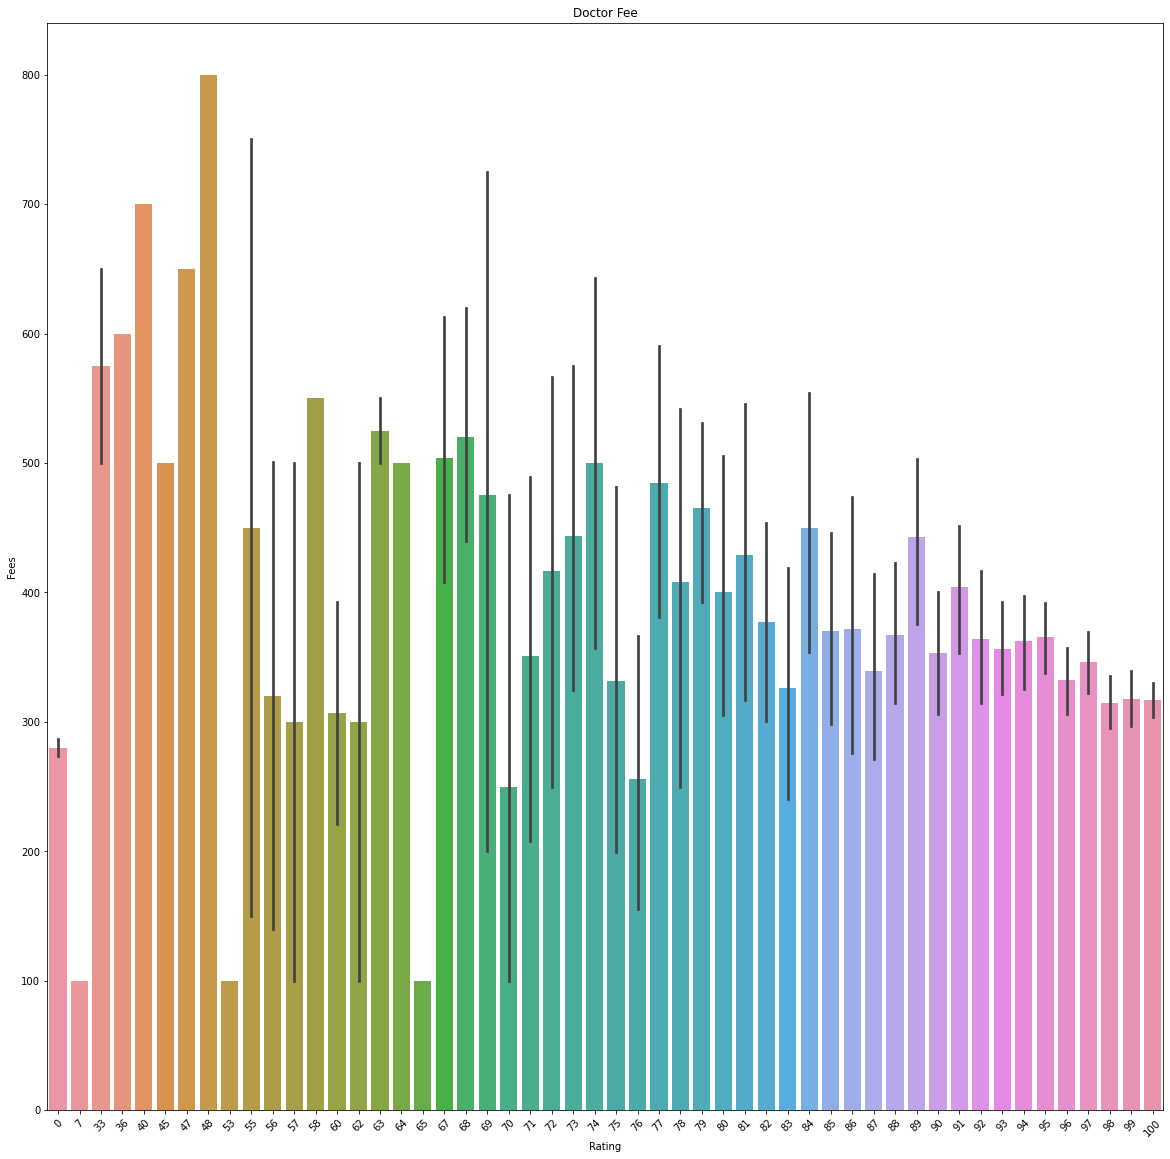

In [21]:
plt.figure(figsize=(20,20))
sns.barplot(x='Rating',y='Fees',data=df)
plt.title("Doctor Fee")
plt.xticks(rotation=45)
plt.show()

The above graph shows that even less rating doctors are chargeing higher consultation fees compare to higher rated consulatnts. Between 33-48 rated consultants are charged higher consultation fees

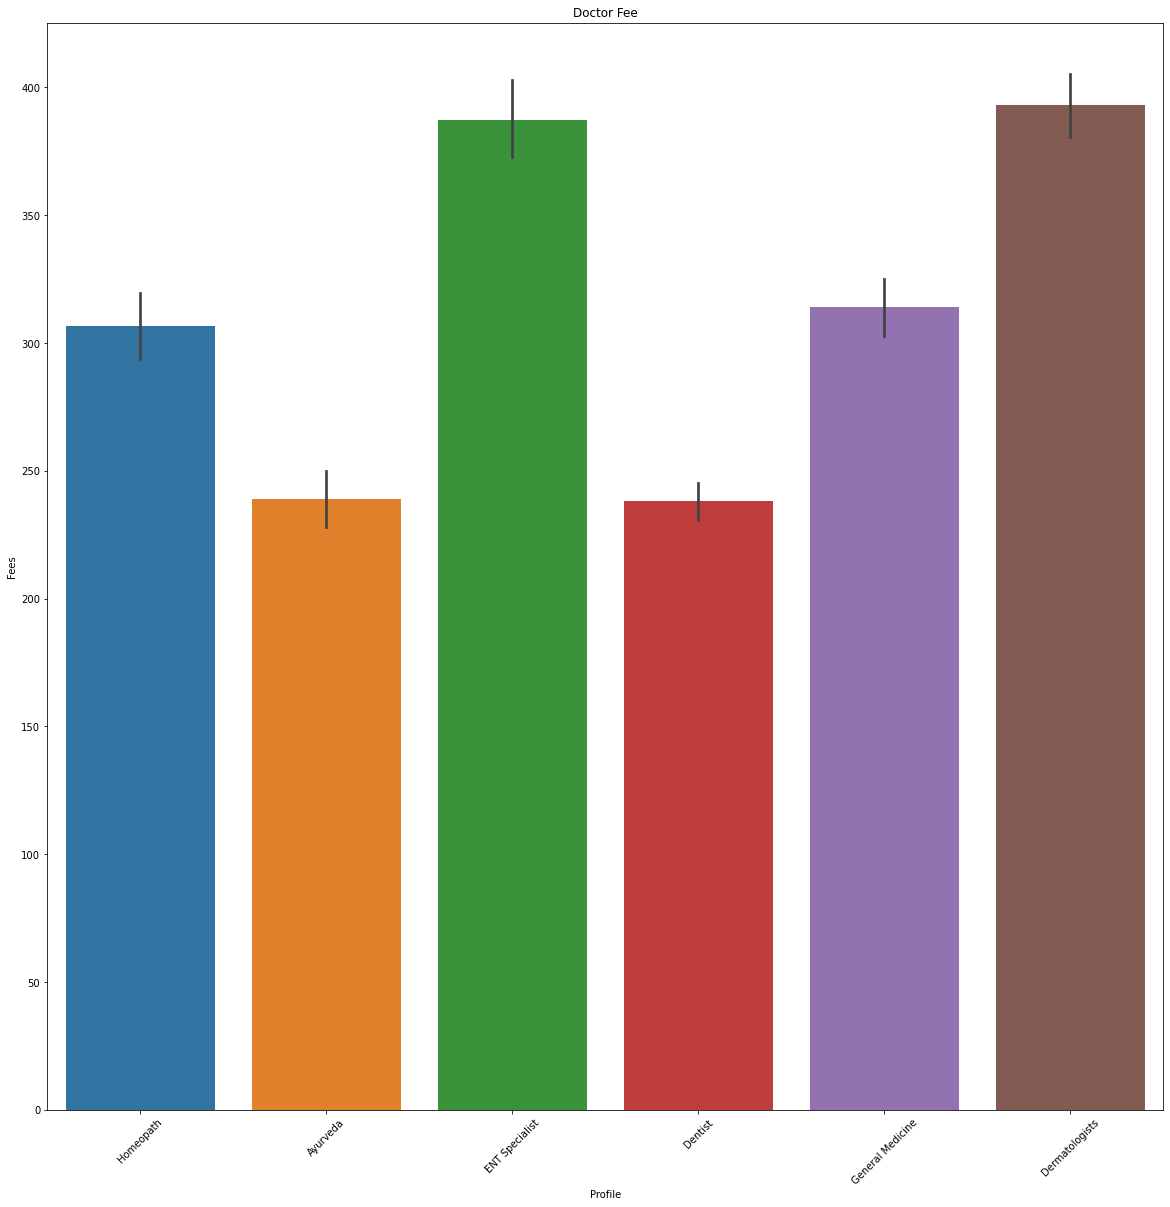

In [22]:
plt.figure(figsize=(20,20))
sns.barplot(x='Profile',y='Fees',data=df)
plt.title("Doctor Fee")
plt.xticks(rotation=45)
plt.show()

ENT Specialist and Dermatologists have higher consultation fee than other medical practitioner

In [23]:
for col in df.select_dtypes(['object']).columns: #Checking categorical data
    print(col, ':', sorted(df[col].unique()))

Qualification : ['39yearsexperience', 'acdmc,ccedm,ccmtd,certificatecourseingestationaldiabetes(ccgdm),diplomainfamilymedicine(dfm),mbbs,postgraduatediplomaindiabetology(pgdd)(cardiffuniversity-uk)', 'acls,advancedtraumalifesupport(atls),basiclifesupport(bls),mbbs', 'advancecourseinosteoporosis,dnb-generalmedicine,eularcertificateforrheumaticdiseases,fellowindianacademyofclinicalmedicine,fellowshipinrheumatology,frcp,mbbs,postgraduatecertificateinhivandstdmanegement', 'advancedcertificatecourseinaestheticdentistry,advancedcertificatecourseindentalimplants,advancedcertificateinendodonticsandesthetics,bds', 'advancedcertificatecourseinaestheticdentistry,bds,comprehensivecourseinmodernendodontics,fage-fellow,professionalimplantologytrainingcourse(pitc)', 'advancedcertificatecourseinaestheticdentistry,bds,fellowofacademyofgeneraleducation(fage)', 'advancedcertificatecourseindentalimplants,bds,mds-orthodonticsandorofacialorthopaedics', 'advancedcertificatecourseindiabetes,advancedcertificat

In [24]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

,Qualification,Place,Profile
0,"bhms,md-homeopathy","Kakkanad, Ernakulam",Homeopath
1,"bams,md-ayurvedamedicine","Whitefield, Bangalore",Ayurveda
2,"mbbs,ms-otorhinolaryngology","Mathikere - BEL, Bangalore",ENT Specialist
3,"bams,bsc-zoology","Bannerghatta Road, Bangalore",Ayurveda
4,bams,"Keelkattalai, Chennai",Ayurveda


In [25]:
var_cat = var_cat.columns.tolist() #converting data
var_cat = ['Qualification','Place','Profile']
var_cat
['Qualification','Place','Profile']

['Qualification', 'Place', 'Profile']

In [26]:
from sklearn.preprocessing import LabelEncoder # using LabelEncoder to Convert catagorical data into numerical
LE=LabelEncoder()

df["Qualification"]=LE.fit_transform(df["Qualification"])
df["Place"]=LE.fit_transform(df["Place"])
df["Profile"]=LE.fit_transform(df["Profile"])

Checking correlation

In [27]:
dfcor=df.corr() 
dfcor

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,0.232508,-0.035584,0.012845,0.517687,0.247376
Experience,0.232508,1.000000,-0.038569,0.015963,0.202073,0.002117
Rating,-0.035584,-0.038569,1.000000,-0.036457,-0.126389,0.153273
Place,0.012845,0.015963,-0.036457,1.000000,0.019529,-0.052505
Profile,0.517687,0.202073,-0.126389,0.019529,1.000000,0.145226
Fees,0.247376,0.002117,0.153273,-0.052505,0.145226,1.000000


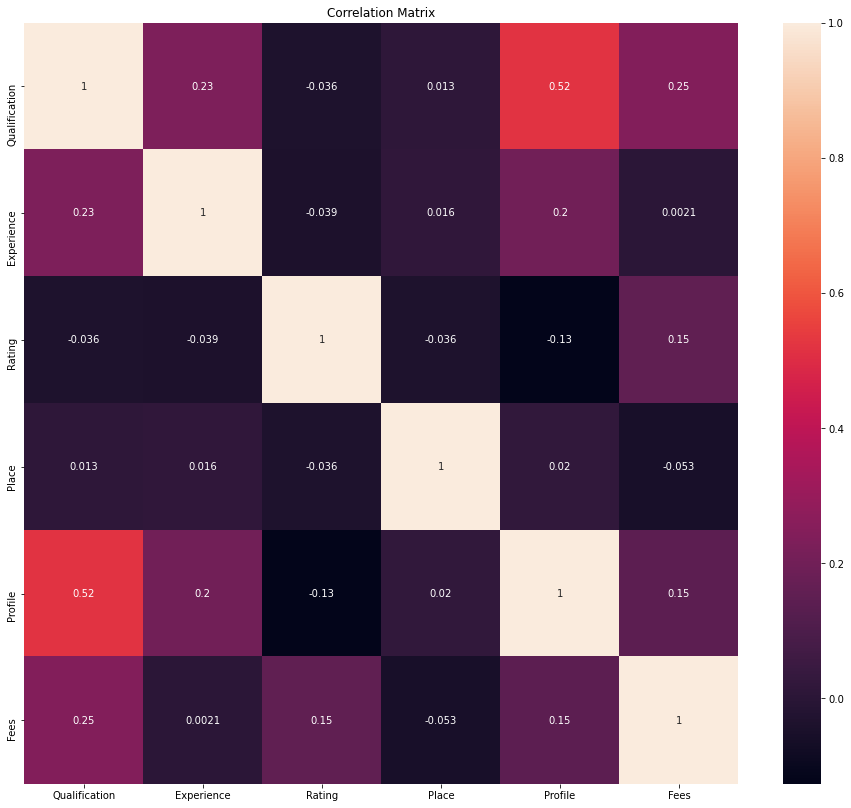

In [28]:
plt.figure(figsize=(16,14))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

The graphs shows that the independent variables have very moderate correlation with target variable

In [29]:
corr_matrix=df.corr()

In [30]:
corr_matrix["Fees"].sort_values(ascending=False)

Fees             1.000000
Qualification    0.247376
Rating           0.153273
Profile          0.145226
Experience       0.002117
Place           -0.052505
Name: Fees, dtype: float64

Checking and dealing with outliers

Qualification       AxesSubplot(0.125,0.772143;0.168478x0.107857)
Experience       AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Rating           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Place            AxesSubplot(0.731522,0.772143;0.168478x0.107857)
Profile             AxesSubplot(0.125,0.642714;0.168478x0.107857)
Fees             AxesSubplot(0.327174,0.642714;0.168478x0.107857)
dtype: object

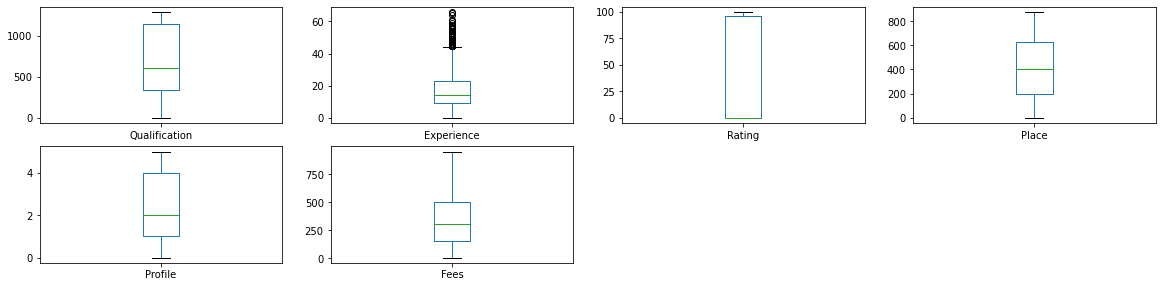

In [31]:
df.plot(kind='box',subplots=True, layout=(6,4), figsize= (20,15))

box plot shows that only variable "Experience" has outliers. Lets remove it with the help of Zscore

In [32]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.36026777, 0.60097885, 1.22066882, 0.44625322, 1.54301587,
        1.08926083],
       [1.2410299 , 0.47604029, 1.17841853, 1.74694981, 1.47289258,
        0.22029544],
       [1.39415358, 0.74529508, 0.89184525, 0.16490388, 0.33665249,
        0.04161581],
       ...,
       [1.15028665, 2.12675597, 1.15729339, 0.76730411, 0.93983418,
        1.52985171],
       [1.23315405, 0.20678551, 1.00941741, 1.68506049, 0.93983418,
        1.08926083],
       [0.68700211, 0.02728232, 1.22066882, 0.729644  , 0.86971089,
        0.56543832]])

In [33]:
threshold=3
print(np.where(z>3))

(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
       1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
       2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
       3942, 3960, 4040, 4167, 4212, 4257, 4344, 4581, 4730, 4763, 4775,
       4835, 5195, 5250, 5265, 5277, 5311, 5410, 5422, 5587, 5637, 5664,
       5720, 5807, 5942], dtype=int64), array([1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 1, 1, 5, 1, 5, 1, 1,
       5, 5, 5, 5, 1, 5, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1,
       5, 5, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [34]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(5961, 6)
(5903, 6)


In [35]:
loss_percent=(5961-5903)/5961*100
print(loss_percent)

0.9729911088743499


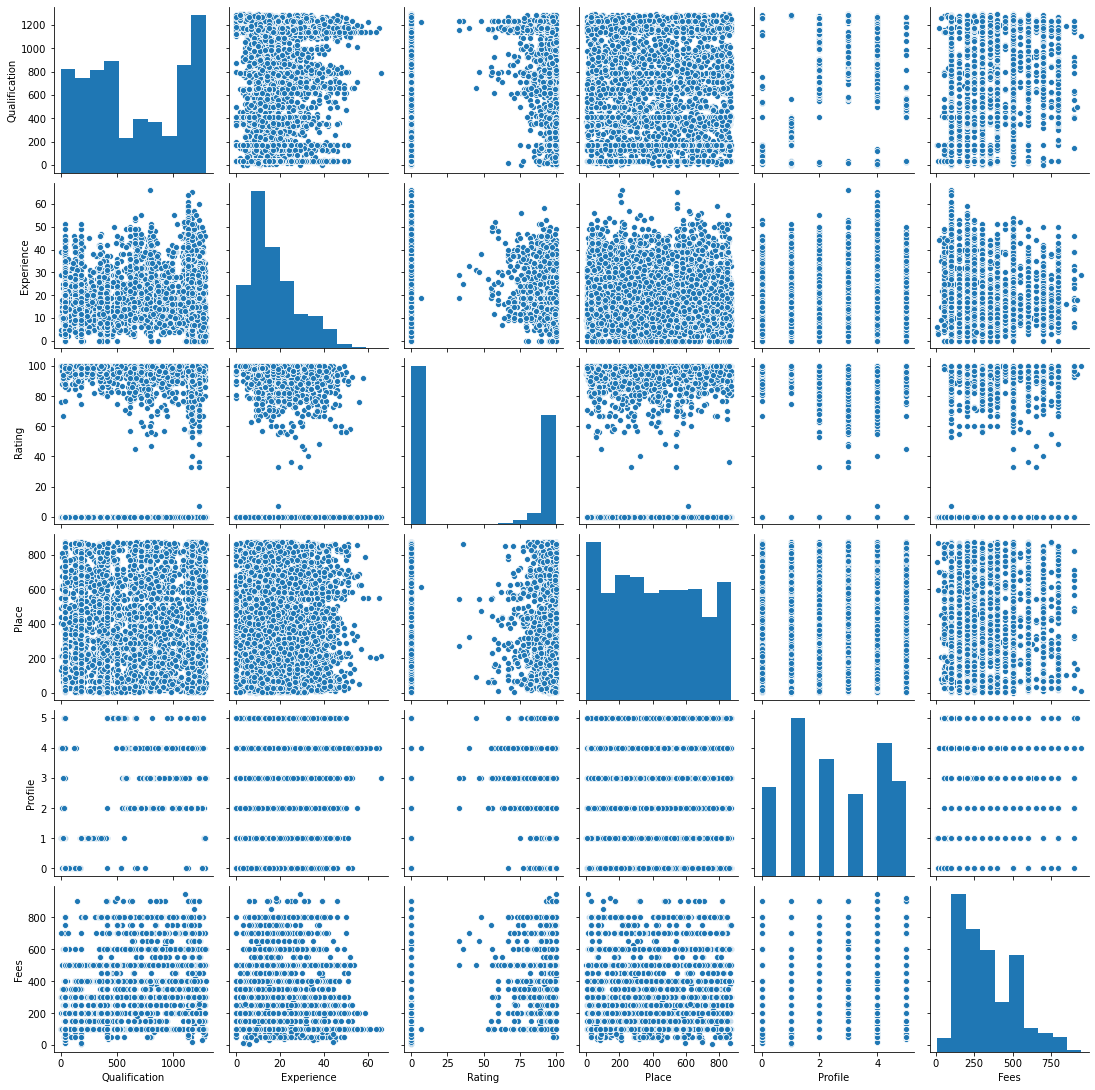

In [36]:
sns.pairplot(df)
plt.show()

Experience and Fees variables have skewness we will work on it with the help of Log methods

In [37]:
df.skew() # Checking Skewness

Qualification    0.090756
Experience       0.991089
Rating           0.247186
Place            0.124862
Profile          0.108803
Fees             0.751870
dtype: float64

In [38]:
skew=("Experience","Fees")
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [39]:
df.skew()

Qualification    0.090756
Experience      -0.895198
Rating           0.247186
Place            0.124862
Profile          0.108803
Fees            -0.298173
dtype: float64

Splitting Target Variable

In [40]:
x=df.drop("Fees",axis=1)
y=df["Fees"]

Scalling training and testing the model

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.36026777,  0.74459804,  1.22066882, -0.44625322,  1.54301587],
       [-1.2410299 , -0.20043453,  1.17841853,  1.74694981, -1.47289258],
       [ 1.39415358, -0.57959456, -0.89184525,  0.16490388,  0.33665249],
       ...,
       [ 1.15028665,  1.49434141,  1.15729339, -0.76730411,  0.93983418],
       [ 1.23315405,  0.09963891,  1.00941741,  1.68506049,  0.93983418],
       [-0.68700211,  0.26985499,  1.22066882,  0.729644  , -0.86971089]])

Importing KNN,DT and RF to train and test the Model

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [43]:
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

Checking best accuracy and random_state

In [44]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    predrf=knn.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)

best accuracy is  0.573704438297446 on Random_state 86


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=86)

In [46]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [47]:
predrf_test=knn.predict(x_test)

In [48]:
print(r2_score(y_test,predrf_test))

0.573704438297446


In [49]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))


0.5258159003969038
Mean absolute error: 0.3646218150160369
Mean squared error: 0.18878356284275524
Root mean squared error: 0.43449230469912264


Cross validating the model accuracy with the help of Cross_val_score

In [50]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.5258159003969038

In [51]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor()
score=cross_val_score(knn, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.5258159003969038

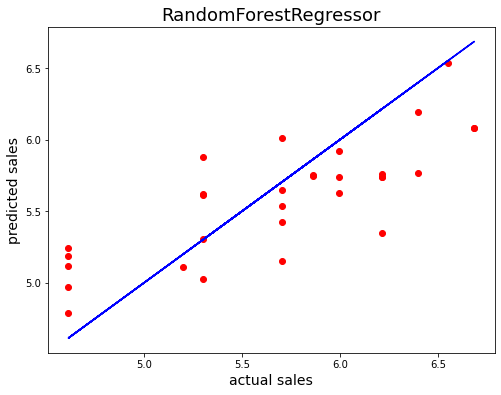

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual sales',fontsize=14)
plt.ylabel('predicted sales',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

I am going with RandomForestRegressor to hypertune the model as it has the best accuracy after validating the Model

In [53]:
from sklearn.model_selection import GridSearchCV  #Hyper tuning with Gridsearch
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf_decision=rf.predict(x_test)
rfs=r2_score(y_test,predrf_decision)
print("R2 Score:",rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("corss val score:",rfs*100)

Saving model

In [ ]:
import joblib
joblib.dump(rf,"doctors_fees.csv.obj")

In [ ]:
p=joblib.load("doctors_fees.csv.obj")

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
advt_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
advt_com

Working with Test data

In [ ]:
df2=pd.read_csv("doctor_test.csv") #Loading dataset

In [ ]:
df2

In [ ]:
df2.columns

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Place: Area and the city where the doctor is located.

In [ ]:
df2.keys

In [ ]:
df2.info

In [ ]:
df2.dtypes #Checking datatype

All variables have object type data

In [ ]:
df2.isnull().sum() #Checking null values

Like train data our test data also have null values in Rating, Place and Miscellaneous_Info. I am going to treat it like train data. And removing Miscellaneous_Info and replacing rating with 0% and Place with NaN values

In [ ]:
df2.drop(['Miscellaneous_Info'],axis=1, inplace= True)

In [ ]:
df2['Rating'].fillna('0%',inplace=True)

In [ ]:
df2['Place'].fillna('NaN',inplace=True)

In [ ]:
df2.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()

df2["Place"]=LE.fit_transform(df2["Place"])
df2["Profile"]=LE.fit_transform(df2["Profile"])
df2["Qualification"]=LE.fit_transform(df2["Qualification"])
df2["Experience"]=LE.fit_transform(df2["Experience"])
df2["Rating"]=LE.fit_transform(df2["Rating"])

In [ ]:
df2.describe()

In most of the columns there is not high diffrence in mean and 50% and in min-max. So there is not much skewness in dataset. And even there is no outliers present in test dataset

In [ ]:
df2cor=df2.corr() #Checking correlation
df2cor

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(df2cor,annot=True)
plt.title("Correlation Matrix")
plt.show()

All variables have very moderate correlations with each other

In [ ]:
df2.plot(kind='box',subplots=True, layout=(6,4), figsize= (20,15)) #Checking outliers

There is no outliers in any of the columns

Importing training dataset and predicting test dataset

In [ ]:
p=joblib.load(open("doctors_fees.csv.obj","rb"))

In [ ]:
p

In [ ]:
prediction=p.predict(df2)

In [ ]:
prediction